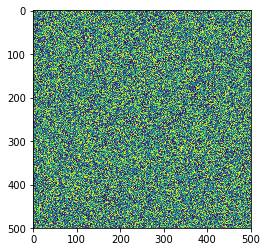

In [3]:
import numpy as np
import matplotlib.pyplot as plt
random_image = np.random.uniform(0., 1., (500, 500))
plt.imshow(random_image)
plt.show()

Type: <class 'numpy.ndarray'> Shape: (303, 384) Data type: uint8


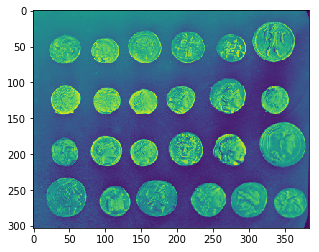

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
url_coins = ('https://raw.githubusercontent.com/scikit-image/scikit-image/' + 
                   'v0.10.1/skimage/data/coins.png')
coins = io.imread(url_coins)
print("Type:", type(coins), "Shape:", coins.shape, "Data type:", coins.dtype)
plt.imshow(coins)
plt.show()

Type: <class 'numpy.ndarray'> Shape: (512, 512, 3) Data type: uint8


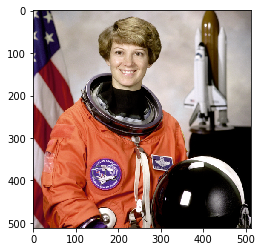

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
url_astronaut = ('https://raw.githubusercontent.com/scikit-image/scikit-image/' +
                          'master/skimage/data/astronaut.png')
astro = io.imread(url_astronaut)
print("Type:", type(astro), "Shape:", astro.shape, "Data type:", astro.dtype)
plt.imshow(astro)
plt.show()

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


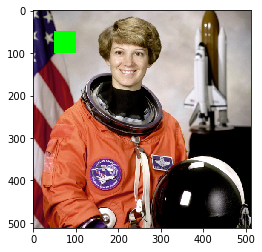

In [18]:
astro_sq = np.copy(astro)

if 0:
    astro_sq[50:100, 50:100] = [0, 255, 0]  # red, green, blue
elif 1:
    sq_mask = np.zeros(astro.shape[:2], bool)
    sq_mask[50:100, 50:100] = True
    astro_sq[sq_mask] = [0, 255, 0]
    
plt.imshow(astro_sq)
plt.show()

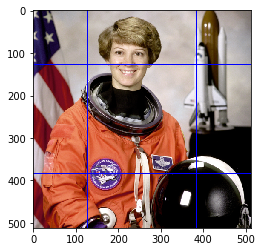

In [19]:
def overlay_grid(image, spacing=128):
    """Return an image with a grid overlay, using the provided spacing.

    Parameters
    ----------
    image : array, shape (M, N, 3)
        The input image.
    spacing : int
        The spacing between the grid lines.

    Returns
    -------
    image_gridded : array, shape (M, N, 3)
        The original image with a blue grid superimposed.
    """
    image_gridded = image.copy()
    image_gridded[spacing:-1:spacing, :] = [0, 0, 255]
    image_gridded[:, spacing:-1:spacing] = [0, 0, 255]
    return image_gridded

plt.imshow(overlay_grid(astro, 128))
plt.show()

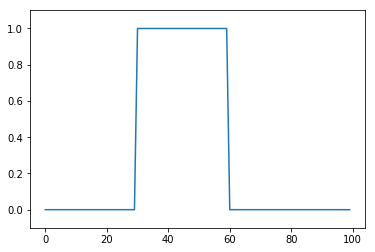

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sig = np.zeros(100, np.float) #
sig[30:60] = 1  # signal = 1 during the period 30-60ms because light is observed
fig, ax = plt.subplots()
ax.plot(sig);
ax.set_ylim(-0.1, 1.1);
plt.show()

Signal on at: 30 ms


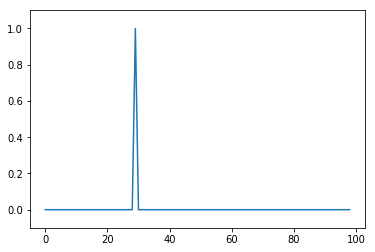

In [3]:
sigdelta = sig[1:]  # sigdelta[0] equals sig[1], and so on
sigdiff = sigdelta - sig[:-1]
sigon = np.clip(sigdiff, 0, np.inf)
fig, ax = plt.subplots()
ax.plot(sigon)
ax.set_ylim(-0.1, 1.1)
print('Signal on at:', 1 + np.flatnonzero(sigon)[0], 'ms')

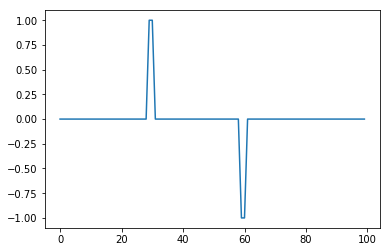

In [4]:
diff = np.array([1, 0, -1])
from scipy import ndimage as ndi
dsig = ndi.convolve(sig, diff)
plt.plot(dsig)